In [1]:
# hierarchical clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

deExpression = pd.read_csv("./data/deExpression_000001.csv", index_col=0)
deExpression

GSM93997  GSM94019  GSM94021  GSM94022  GSM94023  GSM94024   
DCLRE1C            1.736669  1.890625  1.859471  1.816433  1.856808  1.859860  \
TSR1               1.778108  1.999854  1.917083  1.951883  1.910214  1.942902   
ANKRD10-IT1        1.943163  1.981774  1.944664  1.956739  1.933598  1.913482   
FLJ42627           1.816490  1.884213  1.861973  1.918793  1.826515  1.937862   
MKRN4P /// MKRN4P  1.921088  1.982670  1.988287  1.926505  1.912412  1.961996   
...                     ...       ...       ...       ...       ...       ...   
TYMP               1.944370  2.115667  2.087784  2.037272  2.103217  1.971006   
SORBS2             2.081317  2.065822  2.071142  2.023693  2.114289  2.056574   
PTP4A1             1.593905  1.402984  1.562001  1.565092  1.499465  1.471520   
CD84               1.801363  1.827829  1.796062  1.800053  1.812018  1.819213   
ZNF165             1.494792  1.321802  1.380850  1.293921  1.434499  1.255208   

                   GSM94025  GSM94026  GSM94027  GSM94029  ...  GSM98792   
DCLRE1C            1.748516  1.717165  1.759717  1.799537  ...  1.829363  \
TSR1               1.864184  1.873999  1.852613  1.868941  ...  1.843483   
ANKRD10-IT1        1.845036  1.898792  1.863041  1.926962  ...  1.866772   
FLJ42627           1.757519  1.804413  1.812023  1.796461  ...  1.824843   
MKRN4P /// MKRN4P  1.871600  1.886963  1.873838  1.863742  ...  1.882967   
...                     ...       ...       ...       ...  ...       ...   
TYMP               2.010875  2.159453  2.045796  1.996744  ...  2.058575   
SORBS2             2.054628  1.935501  2.100803  2.019737  ...  2.027060   
PTP4A1             1.433620  1.501361  1.494311  1.605895  ...  1.466601   
CD84               1.752182  1.825235  1.733127  1.857395  ...  1.869926   
ZNF165             1.428786  1.200629  1.335131  1.242880  ...  1.342716   

                   GSM98793  GSM98794  GSM98795  GSM98796  GSM98797  GSM98798   
DCLRE1C            1.747269  1.911622  1.725829  1.765874  1.947943  1.895309  \
TSR1               1.805349  1.924756  1.842984  1.872537  2.070643  1.983668   
ANKRD10-IT1        1.876735  1.932622  1.832219  1.845954  2.074631  2.045571   
FLJ42627           1.830859  1.931600  1.794802  1.809172  1.970956  1.938978   
MKRN4P /// MKRN4P  1.917028  2.009446  1.873951  1.891113  2.028432  1.996575   
...                     ...       ...       ...       ...       ...       ...   
TYMP               2.100450  2.176893  2.124595  2.118785  2.116756  2.273789   
SORBS2             2.102633  2.095658  1.994139  2.104295  1.986189  2.001931   
PTP4A1             1.571671  1.602536  1.745207  1.723965  1.548212  1.566881   
CD84               1.866972  1.840802  1.900797  1.782527  1.979765  1.902630   
ZNF165             1.436077  1.465855  1.405984  1.569114  1.379841  1.281191   

                   GSM98799  GSM98800  GSM98801  
DCLRE1C            1.902522  1.815027  1.866366  
TSR1               1.986179  1.895866  1.908146  
ANKRD10-IT1        1.994059  1.934360  1.983095  
FLJ42627           1.959458  1.874794  1.912730  
MKRN4P /// MKRN4P  2.015124  1.926123  1.954363  
...                     ...       ...       ...  
TYMP               2.222385  2.190653  2.037397  
SORBS2             2.056596  2.079327  1.976663  
PTP4A1             1.533653  1.471237  1.557475  
CD84               1.886155  1.874400  1.894015  
ZNF165             1.433117  1.370603  1.246440  

[237 rows x 163 columns]

In [4]:
# import pdata
pdata = pd.read_csv("./data/pData.csv", index_col=0)
pdata

age  biomarker_score  cancer_status  gender  >3cm  packyears   
GSM93997   34        -2.253540              0       1     0       17.0  \
GSM94019   63         8.900589              1       1     1       75.0   
GSM94021   69        -3.460146              1       1     0       70.0   
GSM94022   61         1.543728              1       1     0       80.0   
GSM94023   49         2.108853              1       1     0       20.0   
...       ...              ...            ...     ...   ...        ...   
GSM98797   80        10.349963              0       1     0       65.0   
GSM98798   65         6.959371              0       1     0       99.0   
GSM98799   79        12.789365              0       0     0      180.0   
GSM98800   71         8.073048              0       1     0       45.0   
GSM98801   71        -0.001435              0       1     0       67.0   

          hemopytsis  lymphadenopathy  smoking_status  subjective_assessment  
GSM93997           0                0               0                      0  
GSM94019           0                1               0                      1  
GSM94021           0                1               1                      1  
GSM94022           0                1               0                      1  
GSM94023           0                1               0                      1  
...              ...              ...             ...                    ...  
GSM98797           0                0               1                      0  
GSM98798           0                0               0                      0  
GSM98799           0                0               0                      0  
GSM98800           0                0               0                      0  
GSM98801           0                0               0                      0  

[163 rows x 10 columns]

In [5]:
deExpression = deExpression.T

# add 'cancer_status' to deExpression from pData
deExpression["cancer_status"] = pdata["cancer_status"]
deExpression

DCLRE1C      TSR1  ANKRD10-IT1  FLJ42627  MKRN4P /// MKRN4P   
GSM93997  1.736669  1.778108     1.943163  1.816490           1.921088  \
GSM94019  1.890625  1.999854     1.981774  1.884213           1.982670   
GSM94021  1.859471  1.917083     1.944664  1.861973           1.988287   
GSM94022  1.816433  1.951883     1.956739  1.918793           1.926505   
GSM94023  1.856808  1.910214     1.933598  1.826515           1.912412   
...            ...       ...          ...       ...                ...   
GSM98797  1.947943  2.070643     2.074631  1.970956           2.028432   
GSM98798  1.895309  1.983668     2.045571  1.938978           1.996575   
GSM98799  1.902522  1.986179     1.994059  1.959458           2.015124   
GSM98800  1.815027  1.895866     1.934360  1.874794           1.926123   
GSM98801  1.866366  1.908146     1.983095  1.912730           1.954363   

             PRDX2    RPL35A     MYO1C       LPP   SLC35E1  ...      SMA4   
GSM93997  1.596533  2.311149  2.025783  1.612812  2.093463  ...  1.605994  \
GSM94019  1.645614  2.230759  2.150125  1.680378  2.201057  ...  1.821372   
GSM94021  1.607466  2.333336  2.133555  1.632029  2.175294  ...  1.726442   
GSM94022  1.717598  2.281612  2.145533  1.667602  2.198765  ...  1.744359   
GSM94023  1.655729  2.285197  2.044367  1.652952  2.161562  ...  1.737661   
...            ...       ...       ...       ...       ...  ...       ...   
GSM98797  1.632095  2.228946  2.190887  1.670662  2.297208  ...  1.771683   
GSM98798  1.747395  2.200428  2.164803  1.691874  2.263826  ...  1.759801   
GSM98799  1.758971  2.184716  2.175040  1.682907  2.217886  ...  1.832496   
GSM98800  1.727197  2.238448  2.093912  1.640786  2.167290  ...  1.718556   
GSM98801  1.740545  2.261672  2.096185  1.696188  2.198741  ...  1.723213   

           RUNDC3A     CEP57    TM9SF1      TYMP    SORBS2    PTP4A1   
GSM93997  1.651066  1.117039  1.927284  1.944370  2.081317  1.593905  \
GSM94019  1.656508  1.086588  1.903388  2.115667  2.065822  1.402984   
GSM94021  1.602320  1.110691  1.970626  2.087784  2.071142  1.562001   
GSM94022  1.627072  1.216401  1.921753  2.037272  2.023693  1.565092   
GSM94023  1.587649  1.161339  1.911326  2.103217  2.114289  1.499465   
...            ...       ...       ...       ...       ...       ...   
GSM98797  1.763326  1.142052  1.843000  2.116756  1.986189  1.548212   
GSM98798  1.713657  1.230940  1.888721  2.273789  2.001931  1.566881   
GSM98799  1.671895  1.091142  1.922107  2.222385  2.056596  1.533653   
GSM98800  1.696547  1.083948  1.899443  2.190653  2.079327  1.471237   
GSM98801  1.702366  1.143543  1.871444  2.037397  1.976663  1.557475   

              CD84    ZNF165  cancer_status  
GSM93997  1.801363  1.494792              0  
GSM94019  1.827829  1.321802              1  
GSM94021  1.796062  1.380850              1  
GSM94022  1.800053  1.293921              1  
GSM94023  1.812018  1.434499              1  
...            ...       ...            ...  
GSM98797  1.979765  1.379841              0  
GSM98798  1.902630  1.281191              0  
GSM98799  1.886155  1.433117              0  
GSM98800  1.874400  1.370603              0  
GSM98801  1.894015  1.246440              0  

[163 rows x 238 columns]

/Users/vornao/Desktop/unipi/CHL/project/.venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/vornao/Desktop/unipi/CHL/project/.venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


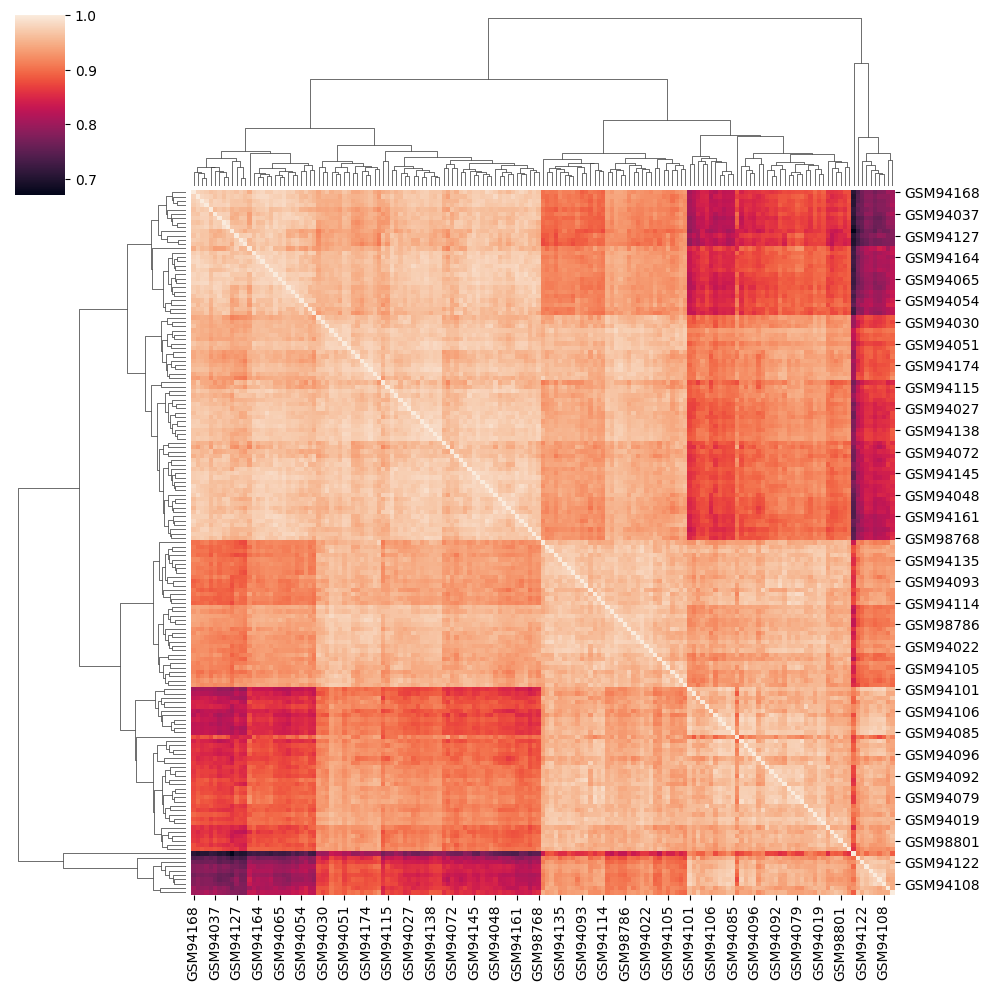

In [15]:
# plot corrrlation matrix
corr = deExpression.drop(["cancer_status"], axis=1).T.corr()
# make hierarchical heatmap with cancer status
sns.clustermap(corr)

In [17]:
deExpression

DCLRE1C      TSR1  ANKRD10-IT1  FLJ42627  MKRN4P /// MKRN4P   
GSM93997  1.736669  1.778108     1.943163  1.816490           1.921088  \
GSM94019  1.890625  1.999854     1.981774  1.884213           1.982670   
GSM94021  1.859471  1.917083     1.944664  1.861973           1.988287   
GSM94022  1.816433  1.951883     1.956739  1.918793           1.926505   
GSM94023  1.856808  1.910214     1.933598  1.826515           1.912412   
...            ...       ...          ...       ...                ...   
GSM98797  1.947943  2.070643     2.074631  1.970956           2.028432   
GSM98798  1.895309  1.983668     2.045571  1.938978           1.996575   
GSM98799  1.902522  1.986179     1.994059  1.959458           2.015124   
GSM98800  1.815027  1.895866     1.934360  1.874794           1.926123   
GSM98801  1.866366  1.908146     1.983095  1.912730           1.954363   

             PRDX2    RPL35A     MYO1C       LPP   SLC35E1  ...      SMA4   
GSM93997  1.596533  2.311149  2.025783  1.612812  2.093463  ...  1.605994  \
GSM94019  1.645614  2.230759  2.150125  1.680378  2.201057  ...  1.821372   
GSM94021  1.607466  2.333336  2.133555  1.632029  2.175294  ...  1.726442   
GSM94022  1.717598  2.281612  2.145533  1.667602  2.198765  ...  1.744359   
GSM94023  1.655729  2.285197  2.044367  1.652952  2.161562  ...  1.737661   
...            ...       ...       ...       ...       ...  ...       ...   
GSM98797  1.632095  2.228946  2.190887  1.670662  2.297208  ...  1.771683   
GSM98798  1.747395  2.200428  2.164803  1.691874  2.263826  ...  1.759801   
GSM98799  1.758971  2.184716  2.175040  1.682907  2.217886  ...  1.832496   
GSM98800  1.727197  2.238448  2.093912  1.640786  2.167290  ...  1.718556   
GSM98801  1.740545  2.261672  2.096185  1.696188  2.198741  ...  1.723213   

           RUNDC3A     CEP57    TM9SF1      TYMP    SORBS2    PTP4A1   
GSM93997  1.651066  1.117039  1.927284  1.944370  2.081317  1.593905  \
GSM94019  1.656508  1.086588  1.903388  2.115667  2.065822  1.402984   
GSM94021  1.602320  1.110691  1.970626  2.087784  2.071142  1.562001   
GSM94022  1.627072  1.216401  1.921753  2.037272  2.023693  1.565092   
GSM94023  1.587649  1.161339  1.911326  2.103217  2.114289  1.499465   
...            ...       ...       ...       ...       ...       ...   
GSM98797  1.763326  1.142052  1.843000  2.116756  1.986189  1.548212   
GSM98798  1.713657  1.230940  1.888721  2.273789  2.001931  1.566881   
GSM98799  1.671895  1.091142  1.922107  2.222385  2.056596  1.533653   
GSM98800  1.696547  1.083948  1.899443  2.190653  2.079327  1.471237   
GSM98801  1.702366  1.143543  1.871444  2.037397  1.976663  1.557475   

              CD84    ZNF165  cancer_status  
GSM93997  1.801363  1.494792              0  
GSM94019  1.827829  1.321802              1  
GSM94021  1.796062  1.380850              1  
GSM94022  1.800053  1.293921              1  
GSM94023  1.812018  1.434499              1  
...            ...       ...            ...  
GSM98797  1.979765  1.379841              0  
GSM98798  1.902630  1.281191              0  
GSM98799  1.886155  1.433117              0  
GSM98800  1.874400  1.370603              0  
GSM98801  1.894015  1.246440              0  

[163 rows x 238 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

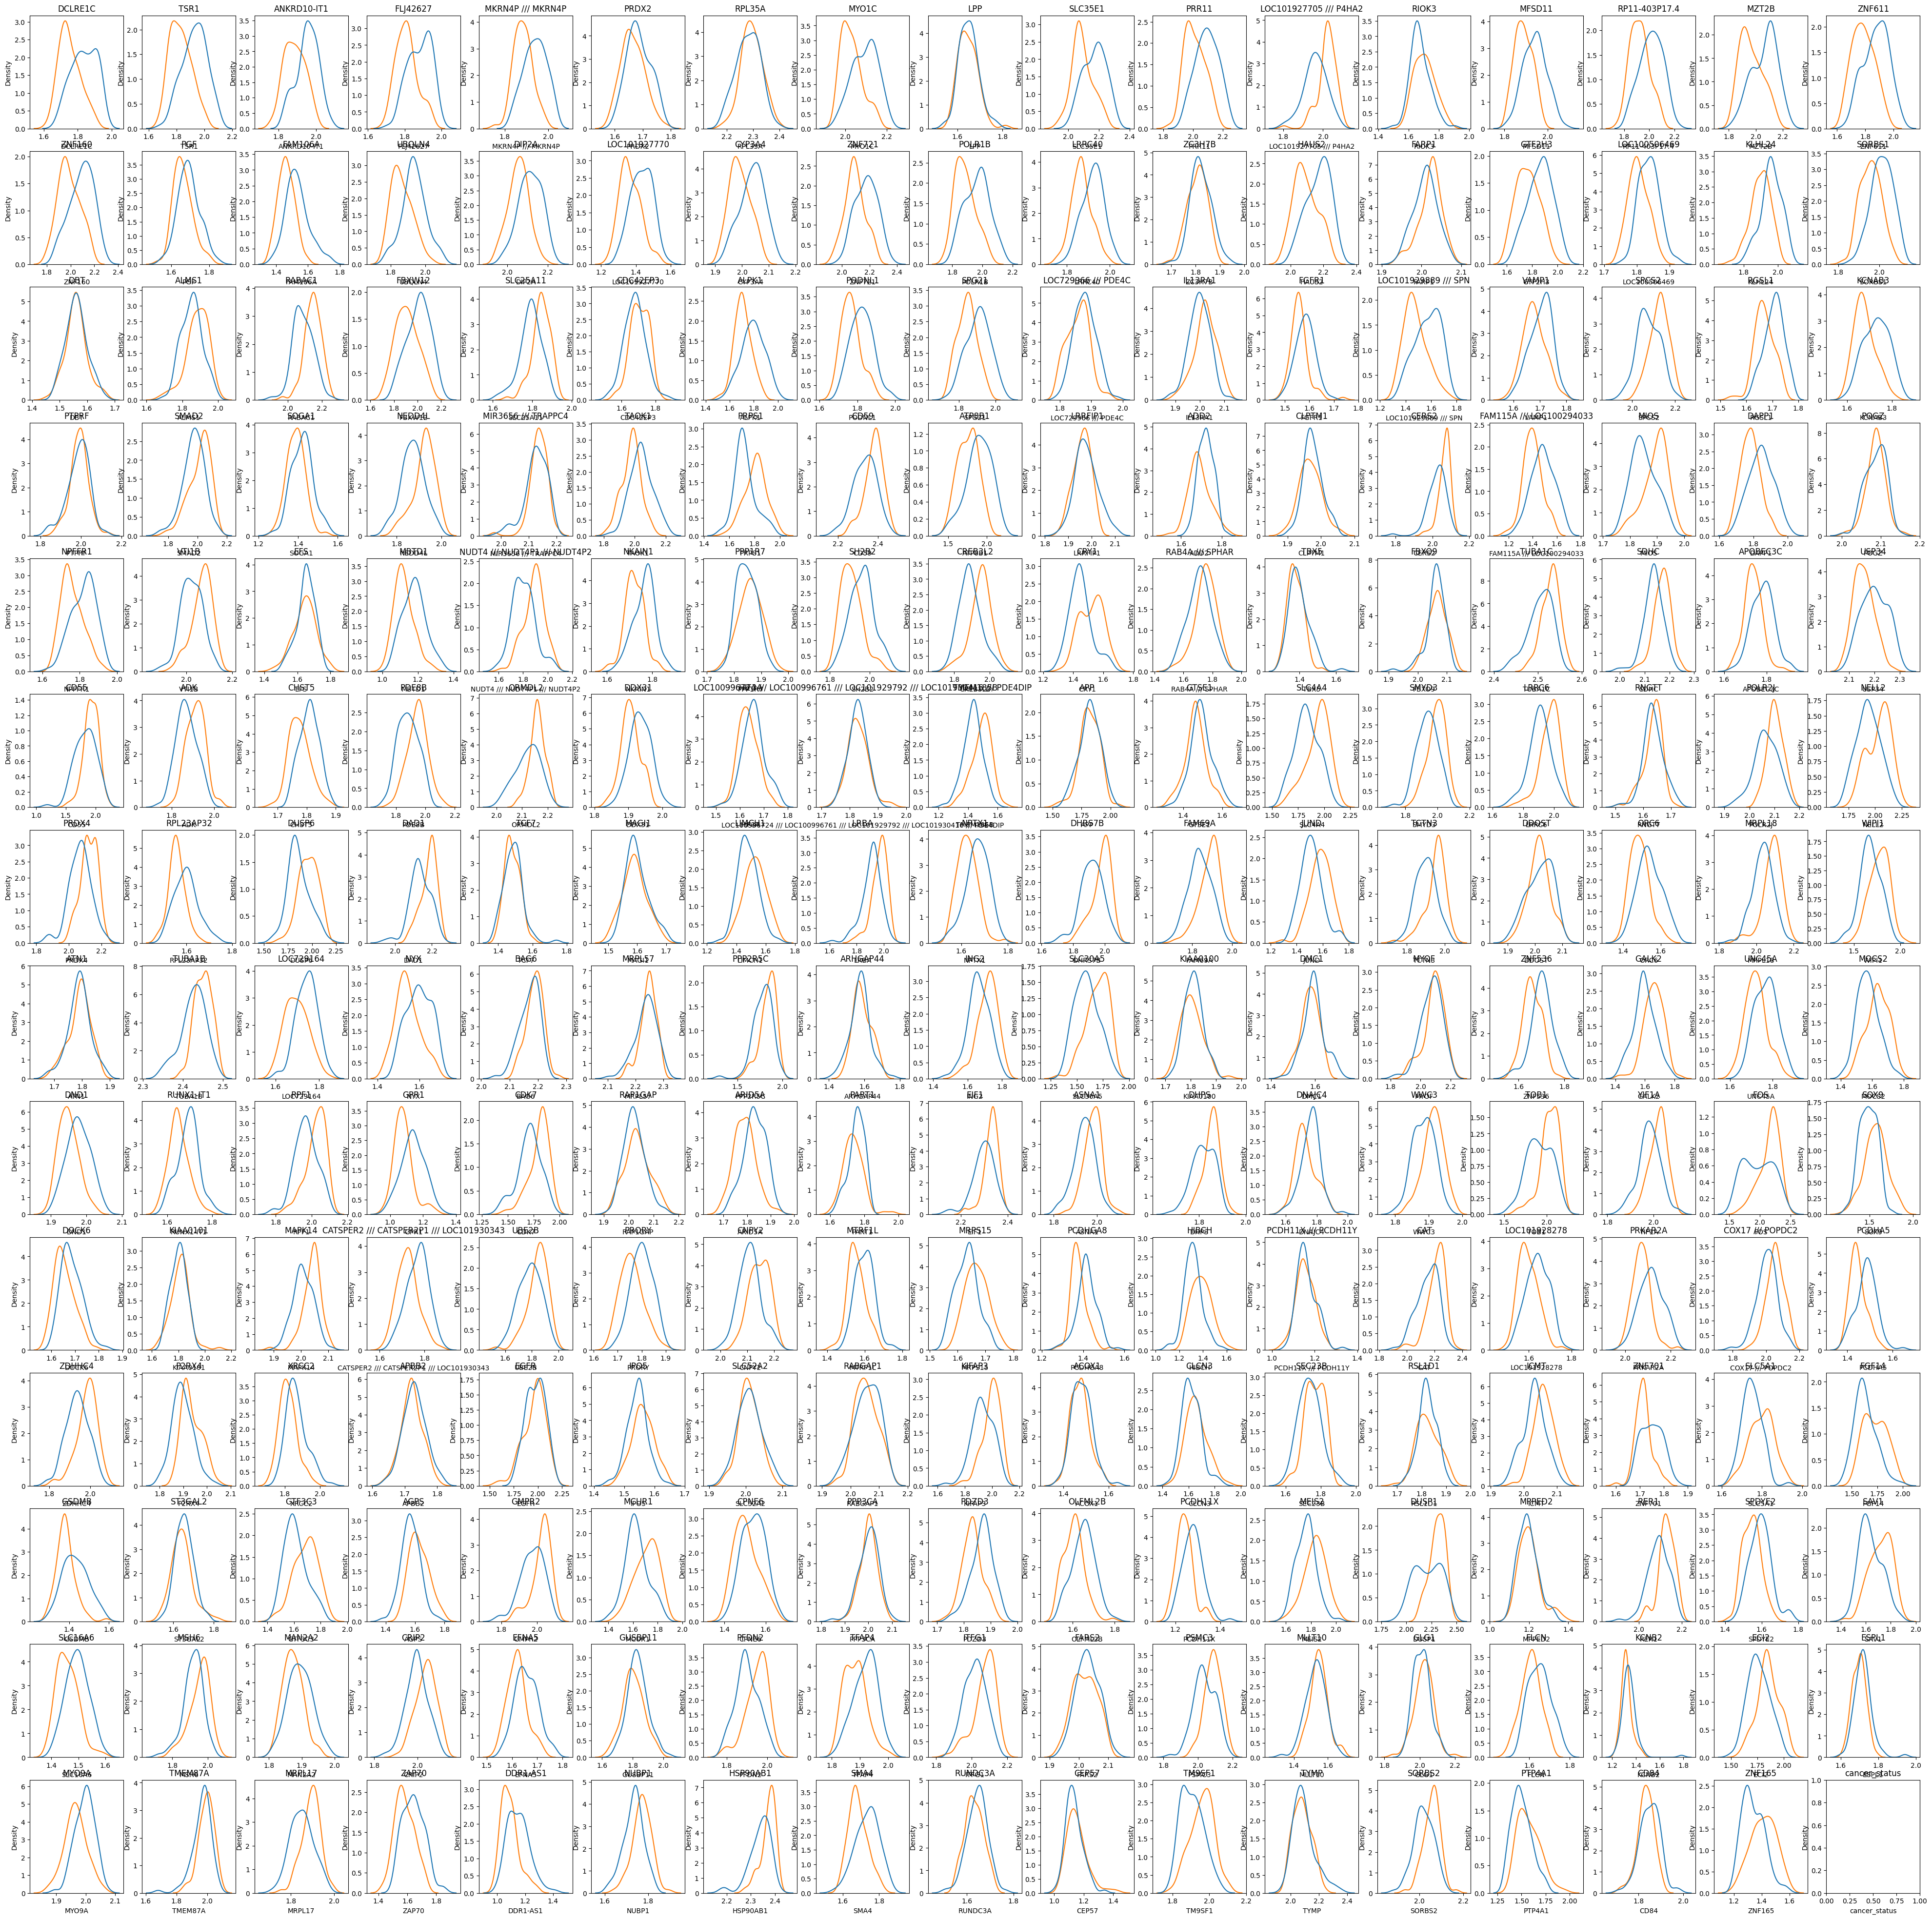

In [23]:
# make histplot for each column, hue cancer status, with plt.subplots in a 14x17 grid
fig, axes = plt.subplots(14, 17, figsize=(50, 50))
for i, col in enumerate(deExpression.columns):
    sns.kdeplot(data=deExpression, x=col, hue="cancer_status", ax=axes[i // 17, i % 17])
    # title is the column name
    axes[i // 17, i % 17].set_title(col)
    # do not put legend
    axes[i // 17, i % 17].legend().set_visible(False)
plt.show()

In [33]:
# make KMeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# make scaler
scaler = StandardScaler()
# scale data
scaled_data = scaler.fit_transform(deExpression.drop(["cancer_status"], axis=1))

# make KMeans model
kmeans = KMeans(n_clusters=6, n_init="auto")
# fit model
kmeans.fit(scaled_data)

# print sse
print(kmeans.inertia_)

20833.847688366972


In [34]:
# add kmeans labels to deExpression
deExpression["kmeans_label"] = kmeans.labels_
deExpression

DCLRE1C      TSR1  ANKRD10-IT1  FLJ42627  MKRN4P /// MKRN4P   
GSM93997  1.736669  1.778108     1.943163  1.816490           1.921088  \
GSM94019  1.890625  1.999854     1.981774  1.884213           1.982670   
GSM94021  1.859471  1.917083     1.944664  1.861973           1.988287   
GSM94022  1.816433  1.951883     1.956739  1.918793           1.926505   
GSM94023  1.856808  1.910214     1.933598  1.826515           1.912412   
...            ...       ...          ...       ...                ...   
GSM98797  1.947943  2.070643     2.074631  1.970956           2.028432   
GSM98798  1.895309  1.983668     2.045571  1.938978           1.996575   
GSM98799  1.902522  1.986179     1.994059  1.959458           2.015124   
GSM98800  1.815027  1.895866     1.934360  1.874794           1.926123   
GSM98801  1.866366  1.908146     1.983095  1.912730           1.954363   

             PRDX2    RPL35A     MYO1C       LPP   SLC35E1  ...   RUNDC3A   
GSM93997  1.596533  2.311149  2.025783  1.612812  2.093463  ...  1.651066  \
GSM94019  1.645614  2.230759  2.150125  1.680378  2.201057  ...  1.656508   
GSM94021  1.607466  2.333336  2.133555  1.632029  2.175294  ...  1.602320   
GSM94022  1.717598  2.281612  2.145533  1.667602  2.198765  ...  1.627072   
GSM94023  1.655729  2.285197  2.044367  1.652952  2.161562  ...  1.587649   
...            ...       ...       ...       ...       ...  ...       ...   
GSM98797  1.632095  2.228946  2.190887  1.670662  2.297208  ...  1.763326   
GSM98798  1.747395  2.200428  2.164803  1.691874  2.263826  ...  1.713657   
GSM98799  1.758971  2.184716  2.175040  1.682907  2.217886  ...  1.671895   
GSM98800  1.727197  2.238448  2.093912  1.640786  2.167290  ...  1.696547   
GSM98801  1.740545  2.261672  2.096185  1.696188  2.198741  ...  1.702366   

             CEP57    TM9SF1      TYMP    SORBS2    PTP4A1      CD84   
GSM93997  1.117039  1.927284  1.944370  2.081317  1.593905  1.801363  \
GSM94019  1.086588  1.903388  2.115667  2.065822  1.402984  1.827829   
GSM94021  1.110691  1.970626  2.087784  2.071142  1.562001  1.796062   
GSM94022  1.216401  1.921753  2.037272  2.023693  1.565092  1.800053   
GSM94023  1.161339  1.911326  2.103217  2.114289  1.499465  1.812018   
...            ...       ...       ...       ...       ...       ...   
GSM98797  1.142052  1.843000  2.116756  1.986189  1.548212  1.979765   
GSM98798  1.230940  1.888721  2.273789  2.001931  1.566881  1.902630   
GSM98799  1.091142  1.922107  2.222385  2.056596  1.533653  1.886155   
GSM98800  1.083948  1.899443  2.190653  2.079327  1.471237  1.874400   
GSM98801  1.143543  1.871444  2.037397  1.976663  1.557475  1.894015   

            ZNF165  cancer_status  kmeans_label  
GSM93997  1.494792              0             4  
GSM94019  1.321802              1             1  
GSM94021  1.380850              1             2  
GSM94022  1.293921              1             5  
GSM94023  1.434499              1             2  
...            ...            ...           ...  
GSM98797  1.379841              0             3  
GSM98798  1.281191              0             3  
GSM98799  1.433117              0             1  
GSM98800  1.370603              0             1  
GSM98801  1.246440              0             3  

[163 rows x 239 columns]

In [35]:
# count patients with cancer_status ==1 for each label
deExpression[deExpression["cancer_status"] == 1].groupby("kmeans_label").count()[
    "cancer_status"
]

kmeans_label
0    15
1     8
2    11
3     3
4    39
5     2
Name: cancer_status, dtype: int64

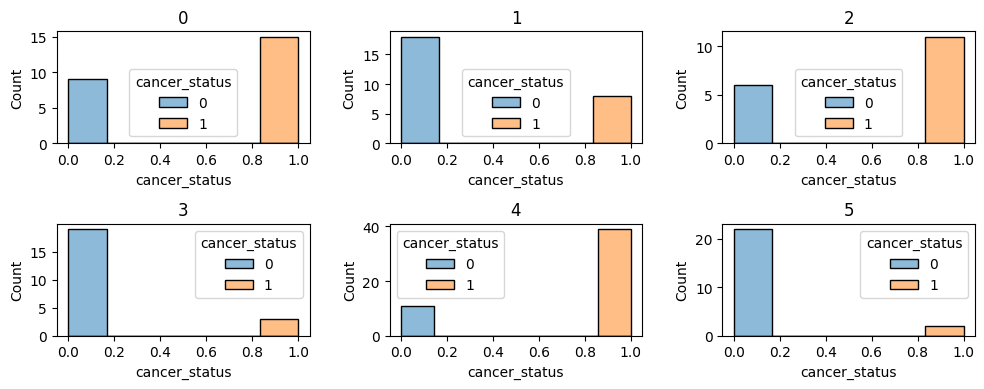

In [45]:
# plot distribution of each cluster with cancer status
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
for i in range(6):
    sns.histplot(
        data=deExpression[deExpression["kmeans_label"] == i],
        x="cancer_status",
        hue="cancer_status",
        ax=axes[i // 3, i % 3],
    )
    # title is the column name
    axes[i // 3, i % 3].set_title(i)
    # do not put legend
fig.tight_layout()

In [93]:
# train SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data
X_train, X_test, y_train, y_test = train_test_split(
    deExpression.drop(["cancer_status"], axis=1),
    deExpression["cancer_status"],
    test_size=0.2,
    random_state=42,
)

# make grid search
from sklearn.model_selection import GridSearchCV

# make model
svc = SVC()
# make grid
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}

# make grid search
gs = GridSearchCV(svc, param_grid)

# fit model
gs.fit(X_train, y_train)

# print best parameters
print(gs.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [94]:
# refit with best parameters
svc = SVC(C=10, gamma=0.01, kernel="linear")

# fit model
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

# print accuracy
print(accuracy_score(y_test, y_pred))

0.7878787878787878


In [97]:
# which are the most important features
# make dataframe with feature importance

feature_importance = pd.DataFrame(
    {
        "feature": deExpression.drop(["cancer_status"], axis=1).columns,
        "importance": svc.coef_[0],
    }
)

In [99]:
# sort by importance
feature_importance.sort_values(by="importance", ascending=False)

feature  importance
185  SLC5A1    3.961037
163   HIBCH    3.000994
106    TCF7    2.555448
12    RIOK3    2.368778
75    SH2B2    2.255011
..      ...         ...
182  RSL1D1   -2.428003
71    MBTD1   -2.520614
138    RPF1   -2.587240
208   EFNA5   -2.667508
111  DHRS7B   -2.946587

[238 rows x 2 columns]

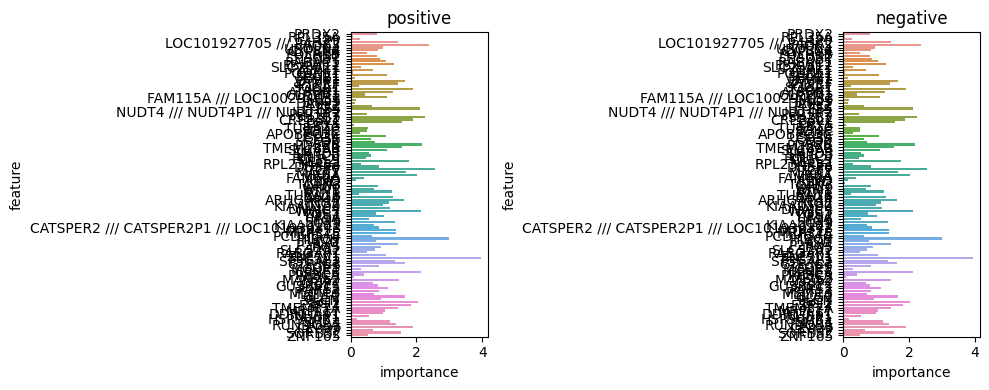

In [101]:
# keep only features with importance > 0
feature_importance = feature_importance[feature_importance["importance"] > 0]

# plot feature importance with subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=feature_importance, x="importance", y="feature", ax=axes[0])
sns.barplot(data=feature_importance, x="importance", y="feature", ax=axes[1])
axes[0].set_title("positive")
axes[1].set_title("negative")
fig.tight_layout()

In [102]:
# compute p values
from scipy.stats import ttest_ind

# make dataframe with p values
p_values = pd.DataFrame(
    {
        "feature": deExpression.drop(["cancer_status"], axis=1).columns,
        "p_value": [
            ttest_ind(
                deExpression[deExpression["cancer_status"] == 0][col],
                deExpression[deExpression["cancer_status"] == 1][col],
            )[1]
            for col in deExpression.drop(["cancer_status"], axis=1).columns
        ],
    }
)
p_values

feature       p_value
0              DCLRE1C  4.386245e-13
1                 TSR1  9.576841e-13
2          ANKRD10-IT1  1.546365e-12
3             FLJ42627  6.340628e-12
4    MKRN4P /// MKRN4P  5.640454e-12
..                 ...           ...
233             SORBS2  1.246952e-07
234             PTP4A1  1.545623e-05
235               CD84  7.229361e-03
236             ZNF165  1.819422e-07
237       kmeans_label  4.406084e-01

[238 rows x 2 columns]